***
$\mathbf{\text{CDS 230 Final Project Group 2}}$<br>
$\mathbf{\text{Geunwoo Park(G01428707), Hyeyeon Kweon(G01446058), Juheon Kim(G01280321),}}$<br>
$\mathbf{\text{Jungbin Eom (G01447366), Soobin Jang (G01399570), WonJune Lee (G01403890)}}$<br>
***

***
${\text{Import Libraries}}$<br>
***

In [1]:
import numpy as np
import pandas as pd
import copy
import openpyxl as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import offline, iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('vader_lexicon')


pd.options.display.float_format = "{:,.1f}".format

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


***
${\text{Introduction of dataset and Research Question (Jungbin, Soobin)}}$<br>
***

In recent years, the film industry has undergone significant transformations. With the emergence of numerous OTT platforms including Netflix, the industry has faced substantial disruptions, including the impact of COVID-19 and the Hollywood strikes. These events, coupled with advancements in technology and shifts in consumer preferences, have led to considerable growth and changes.

This has prompted our group to ask, “What is the current state of the film industry? Is it thriving or declining?” To further explore this question, we’ve selected this dataset called “Movie Industry” which we found from a platform called Kaggle. This dataset encompassing over 4 decades of film data, analyzes the influence of key contributors in different aspects of the film industry, such as directors and actors, from box office performance to critical acceptance.

Our objective is to understand the dynamics and factors contributing to a film’s success. By examining patterns in genres, budgets, total revenue, and critic scores, we aim to identify what makes a film commercially and critically successful. This analysis will help us answer our finalized research question: “What are the factors that contribute to the success of films in the film industry?”

***
${\text{Read Dataset}}$<br>
***

In [56]:
df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0


***
${\text{Overview of Dataset}}$<br>
***

In [57]:
print(f"Records: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

Records: 7668
Features: 15


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [59]:
df.sample(10, random_state=55)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3133,Bean,PG-13,Adventure,1997,"November 7, 1997 (United States)",6.5,"100,000.0",Mel Smith,Rowan Atkinson,Rowan Atkinson,United Kingdom,"18,000,000.0","251,212,670.0",Polygram Filmed Entertainment,89.0
6747,Irrational Man,R,Comedy,2015,"August 7, 2015 (United States)",6.6,"60,000.0",Woody Allen,Woody Allen,Joaquin Phoenix,United States,"11,000,000.0","27,391,084.0",Gravier Productions,95.0
1336,Monkey Shines,R,Drama,1988,"July 29, 1988 (United States)",6.2,"11,000.0",George A. Romero,Michael Stewart,Jason Beghe,United States,"7,000,000.0","5,344,577.0",Orion Pictures,113.0
6343,The Heat,R,Action,2013,"June 28, 2013 (United States)",6.6,"165,000.0",Paul Feig,Katie Dippold,Sandra Bullock,United States,"43,000,000.0","229,930,771.0",Twentieth Century Fox,117.0
6846,Captain America: Civil War,PG-13,Action,2016,"May 6, 2016 (United States)",7.8,"694,000.0",Anthony Russo,Christopher Markus,Chris Evans,United States,"250,000,000.0","1,153,337,496.0",Marvel Studios,147.0
5774,All Good Things,R,Crime,2010,"December 3, 2010 (Canada)",6.3,"54,000.0",Andrew Jarecki,Marcus Hinchey,Ryan Gosling,United States,NaN,"1,754,389.0",Groundswell Productions,101.0
4699,Lord of War,R,Action,2005,"September 16, 2005 (United States)",7.6,"300,000.0",Andrew Niccol,Andrew Niccol,Nicolas Cage,France,"50,000,000.0","72,617,068.0",Entertainment Manufacturing Company,122.0
277,The Final Option,R,Action,1982,"September 16, 1983 (United States)",6.4,"3,000.0",Ian Sharp,George Markstein,Lewis Collins,Switzerland,"6,000,000.0","2,666,873.0",Richmond Light Horse Productions,125.0
2395,Mr. Nanny,PG,Action,1993,"October 8, 1993 (United States)",3.8,"8,900.0",Michael Gottlieb,Edward Rugoff,Hulk Hogan,United States,"10,000,000.0","4,348,572.0",New Line Cinema,84.0
7022,Sanam Teri Kasam,Not Rated,Drama,2016,"February 5, 2016 (India)",7.5,"11,000.0",Radhika Rao,Radhika Rao,Harshvardhan Rane,India,NaN,"1,386,707.0",Jhoom Jhoom Productions,154.0


In [60]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

***
${\text{Making Data Tidy}}$<br>
***

In [61]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

budget     28.3
gross       2.5
rating      1.0
company     0.2
runtime     0.1
score       0.0
votes       0.0
writer      0.0
country     0.0
released    0.0
star        0.0
name        0.0
genre       0.0
year        0.0
director    0.0
dtype: float64

***
${\text{Clean "Budget from Nan" (Geunwoo, Wonjune)}}$<br>
***

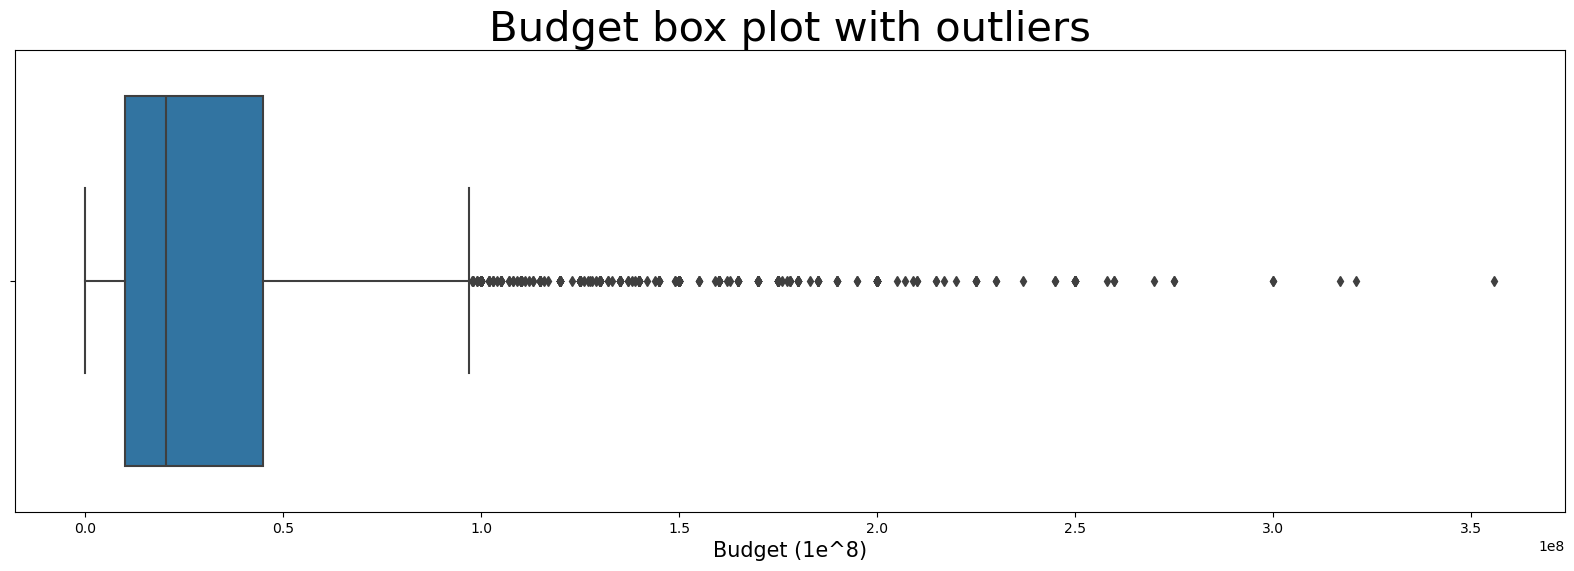

In [62]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['budget'])
plt.title('Budget box plot with outliers', fontsize=30)
plt.xlabel('Budget (1e^8)', fontsize=15)
plt.show()

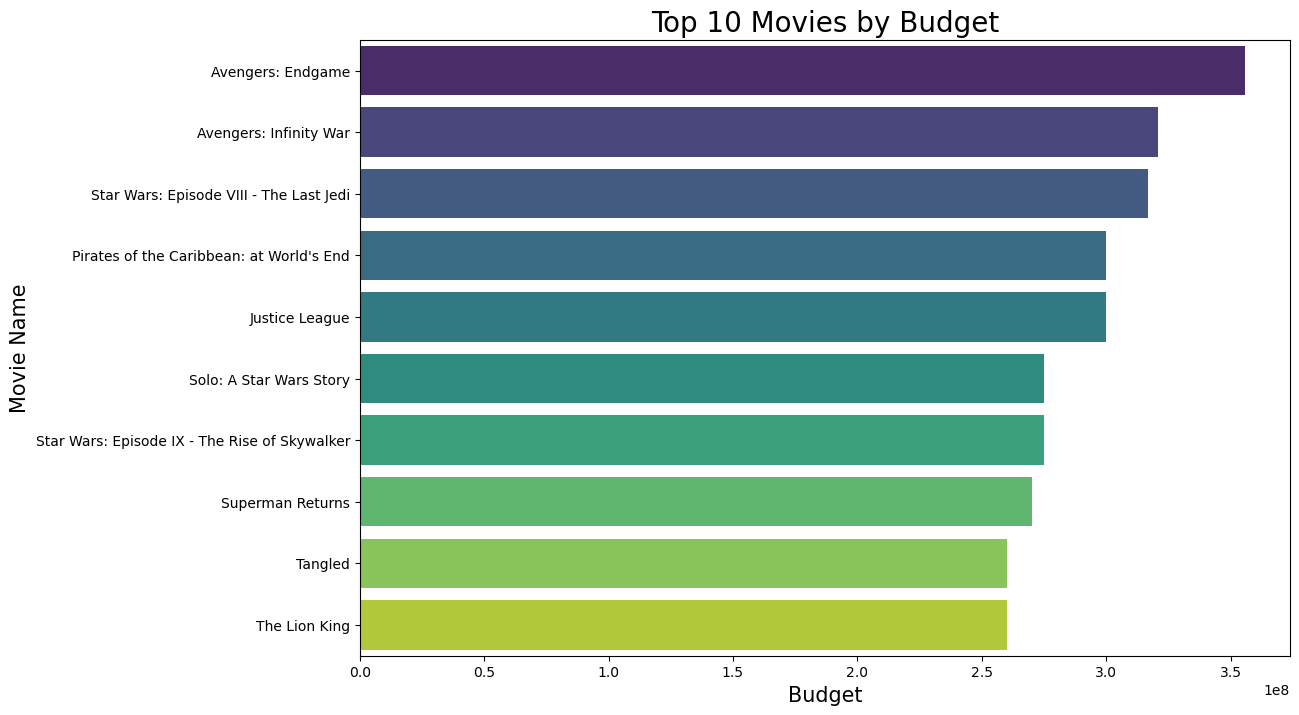

In [63]:
top_10_budget = df.nlargest(10, 'budget')
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_budget['budget'], y=top_10_budget['name'], palette="viridis")
plt.title("Top 10 Movies by Budget", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Movie Name", fontsize=15)
plt.show()

아웃라이어들의 정체 밝히기!


In [64]:
df["budget"].describe()

count         5,497.0
mean     35,589,876.2
std      41,457,296.6
min           3,000.0
25%      10,000,000.0
50%      20,500,000.0
75%      45,000,000.0
max     356,000,000.0
Name: budget, dtype: float64

In [65]:
print(f'Median of Budget {df["budget"].median():,.0f}')

Median of Budget 20,500,000


In [66]:
df["budget"].fillna(df["budget"].median(), inplace=True)

***
${\text{Clean "Gross" from Nan}}$<br>
***

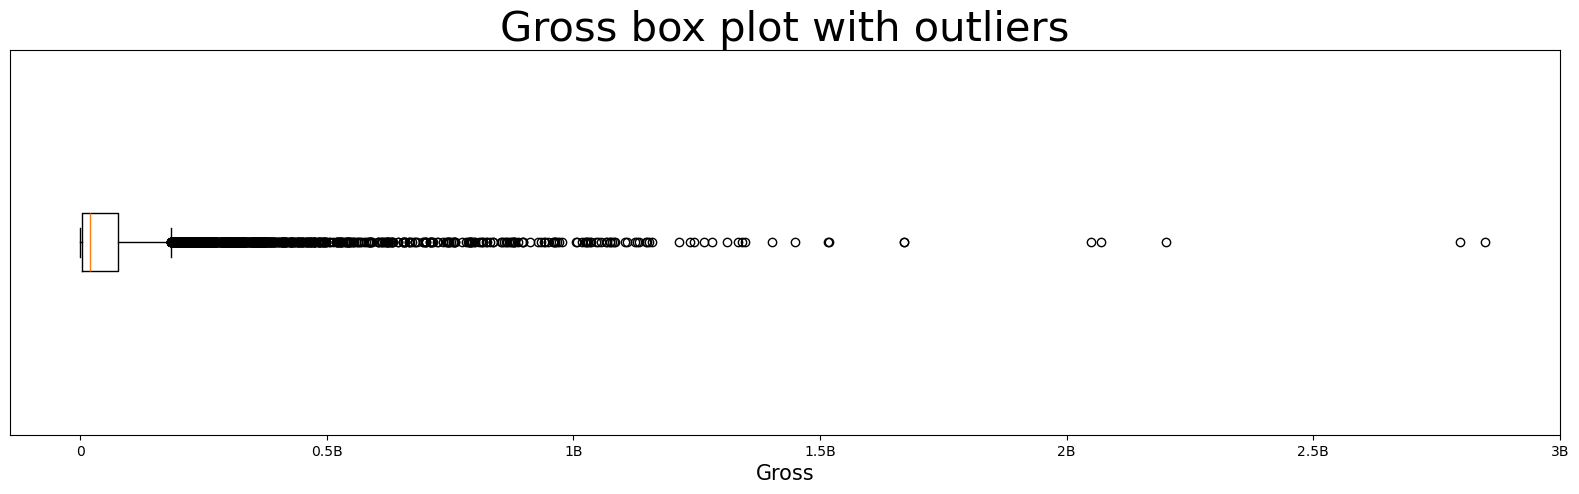

In [67]:
plt.figure(figsize=(20, 5))
plt.boxplot(df["gross"].dropna(), vert=False)
plt.yticks([])
plt.xticks(ticks=[0, 0.5e9, 1e9, 1.5e9, 2e9, 2.5e9, 3e9],
           labels=['0', '0.5B', '1B', '1.5B', '2B', '2.5B', '3B'])
plt.title('Gross box plot with outliers', fontsize=30)
plt.xlabel('Gross', fontsize=15)
plt.show()

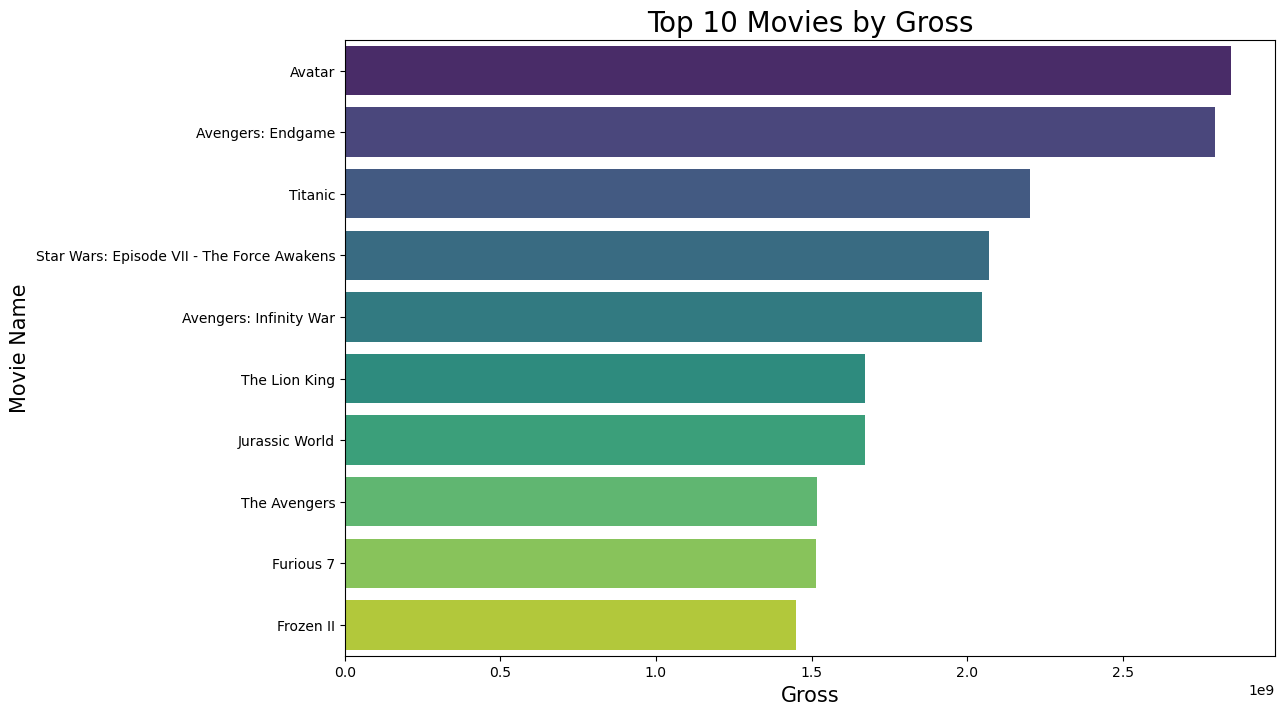

In [68]:
top_10_gross = df.nlargest(10, 'gross')
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_gross['gross'], y=top_10_gross['name'], palette="viridis")
plt.title("Top 10 Movies by Gross", fontsize=20)
plt.xlabel("Gross", fontsize=15)
plt.ylabel("Movie Name", fontsize=15)
plt.show()

아웃라이어들 정체 밝히기!

In [69]:
df.dropna(how= "all", subset ="gross", inplace=True)

In [70]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

rating     0.7
company    0.1
writer     0.0
country    0.0
runtime    0.0
name       0.0
genre      0.0
year       0.0
released   0.0
score      0.0
votes      0.0
director   0.0
star       0.0
budget     0.0
gross      0.0
dtype: float64

***
${\text{Clean "Rating" and "Company" From Nan}}$<br> (WonJune)
***

In [71]:
df["rating"].fillna(df["rating"].mode()[0], inplace=True)

In [72]:
df["company"].fillna(df["company"].mode()[0], inplace=True)

***
${\text{Research Each Important Column}}$<br> (WonJune)
***


In [73]:
rating = df["rating"].value_counts()
(rating / df.shape[0] * 100).apply(lambda x: f"{x: 0.2f} %")

rating
R             49.03 %
PG-13         27.96 %
PG            16.34 %
Not Rated      3.46 %
G              2.03 %
Unrated        0.63 %
NC-17          0.31 %
TV-MA          0.12 %
TV-PG          0.05 %
X              0.04 %
Approved       0.01 %
TV-14          0.01 %
Name: count, dtype: object

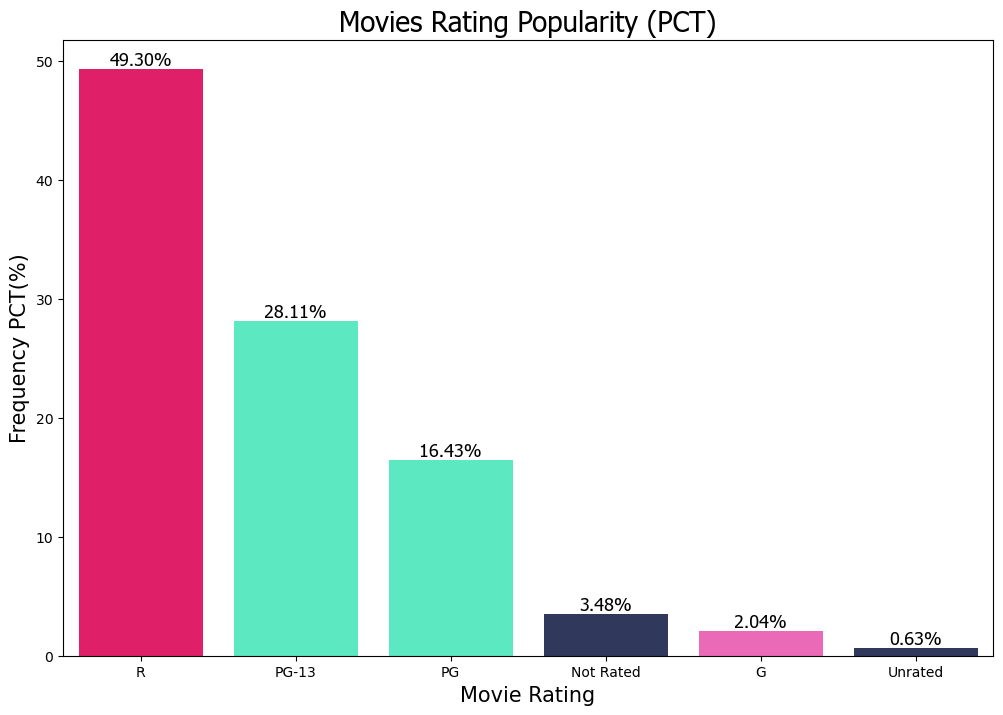

In [74]:
rating = rating[0:6]
rating_pct = rating / rating.sum() * 100

plt.figure(figsize=(12, 8))
bars = sns.barplot(x=rating.index, y=rating_pct, palette=["#FF0060", "#45FFCA", 
                                                          "#45FFCA", "#293462",
                                                          "#FF55BB", "#293462"])
plt.title('Movies Rating Popularity (PCT)', fontsize=20, family='tahoma')
plt.xlabel('Movie Rating', fontsize=15)
plt.ylabel('Frequency PCT(%)', fontsize=15)

for i, bar in enumerate(bars.patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rating_pct[i]:.2f}%', 
             ha='center', va='bottom', fontsize=13, family='tahoma')

plt.show()

G 전체 관람가

PG 부모 지도하 전체관람가

PG-13 부모동반하 13세 이상 관람가

R 17세 미만 보호자동반 관람가

NC-17 17세 미만 관람불가

In [79]:
genre = df["genre"].value_counts()
(genre / sum(genre) * 100).apply(lambda x: f"{x:0.2f} %")

genre
Comedy       29.31 %
Action       22.37 %
Drama        19.63 %
Crime         7.25 %
Biography     5.79 %
Adventure     5.62 %
Animation     4.48 %
Horror        4.10 %
Fantasy       0.57 %
Mystery       0.27 %
Thriller      0.16 %
Family        0.15 %
Romance       0.11 %
Sci-Fi        0.11 %
Western       0.04 %
Musical       0.03 %
Music         0.01 %
Sport         0.01 %
Name: count, dtype: object

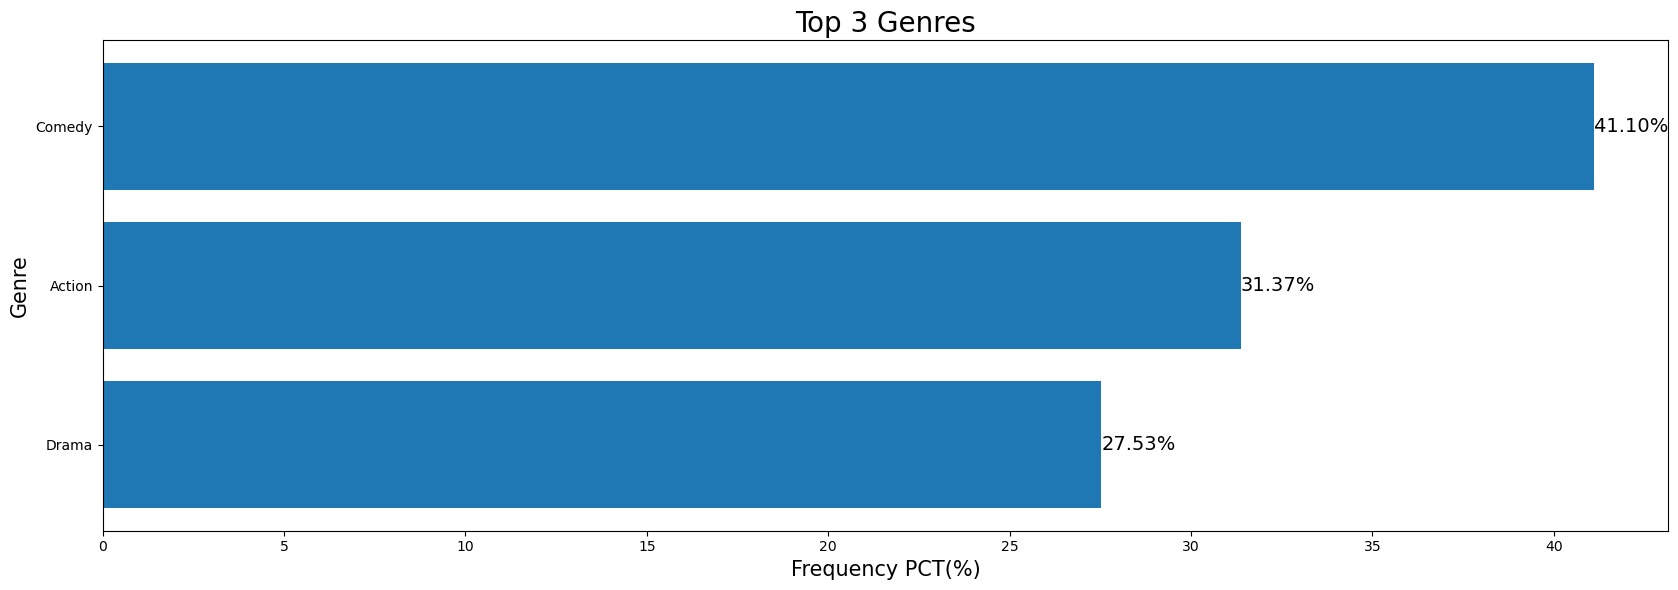

In [76]:
genre = genre.nlargest(3)[::-1]
count = (genre / sum(genre)) * 100
plt.figure(figsize=(17, 6))
bars = plt.barh(genre.index, count)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:0.2f}%", va='center', fontsize=14)

plt.title("Top 3 Genres", fontsize=20)
plt.xlabel("Frequency PCT(%)", fontsize=15)
plt.ylabel("Genre", fontsize=15)
plt.tight_layout()
plt.show()

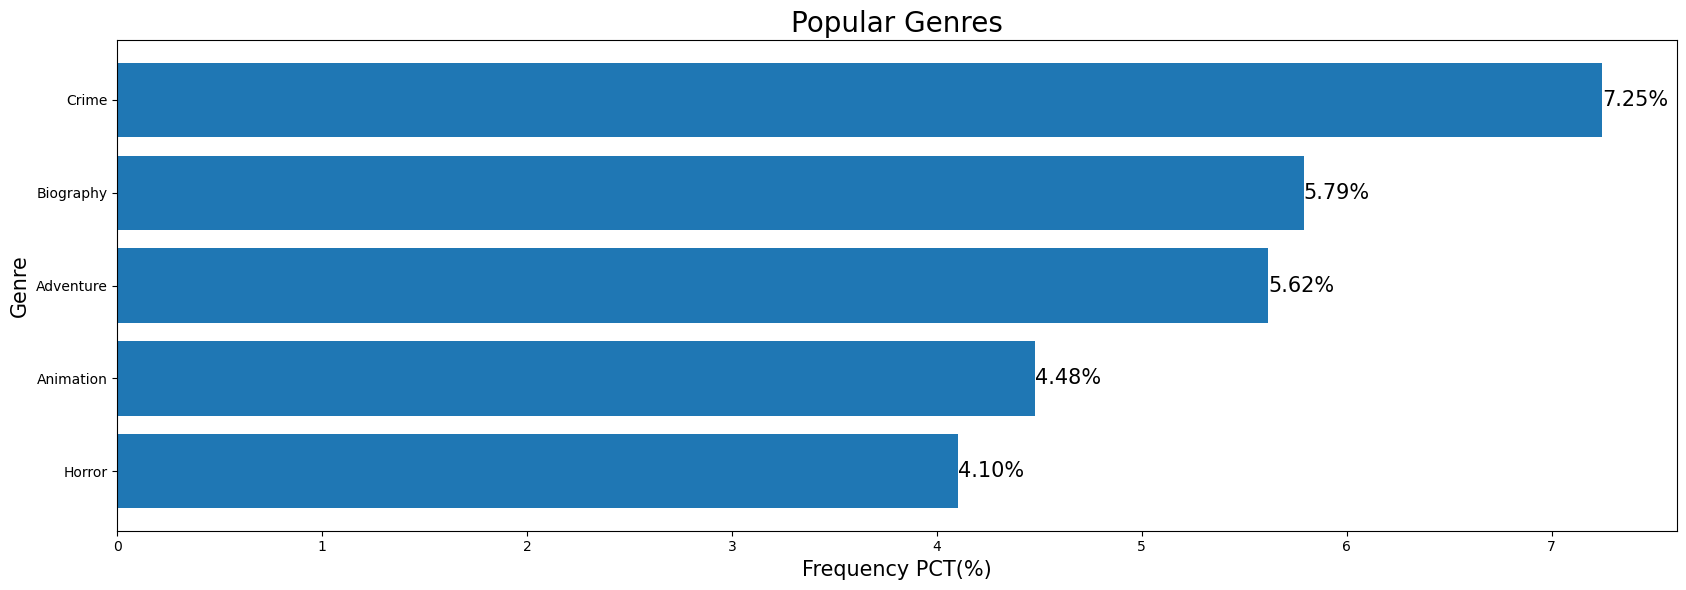

In [78]:
genre2 = genre.nlargest(10).iloc[3:8][::-1]
count2 = (genre2 / sum(genre)) * 100
plt.figure(figsize=(17, 6))
bars = plt.barh(genre2.index, count2)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:0.2f}%", va='center', fontsize=15)

plt.title("Popular Genres", fontsize=20)
plt.xlabel("Frequency PCT(%)", fontsize=15)
plt.ylabel("Genre", fontsize=15)
plt.tight_layout()
plt.show()

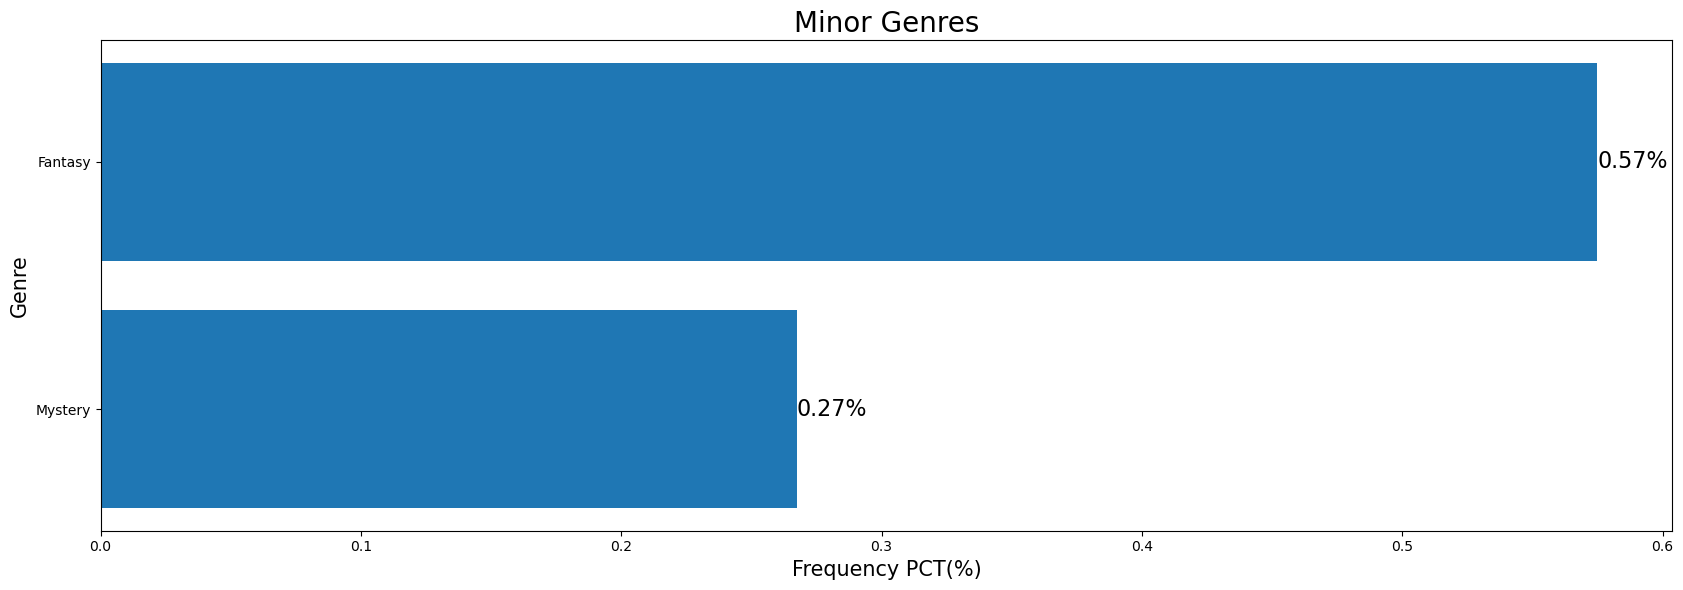

In [80]:
genre3 = genre.nlargest(10).iloc[8:][::-1]
count3 = (genre3 / sum(genre)) * 100
plt.figure(figsize=(17, 6))
bars = plt.barh(genre3.index, count3)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:0.2f}%", va='center', fontsize=16)

plt.title("Minor Genres", fontsize=20)
plt.xlabel("Frequency PCT(%)", fontsize=15)
plt.ylabel("Genre", fontsize=15)
plt.tight_layout()
plt.show()

In [81]:
year = df["year"].value_counts().sort_index()
year.head(10)

year
1980     81
1981    104
1982    119
1983    128
1984    158
1985    177
1986    186
1987    188
1988    191
1989    189
Name: count, dtype: int64

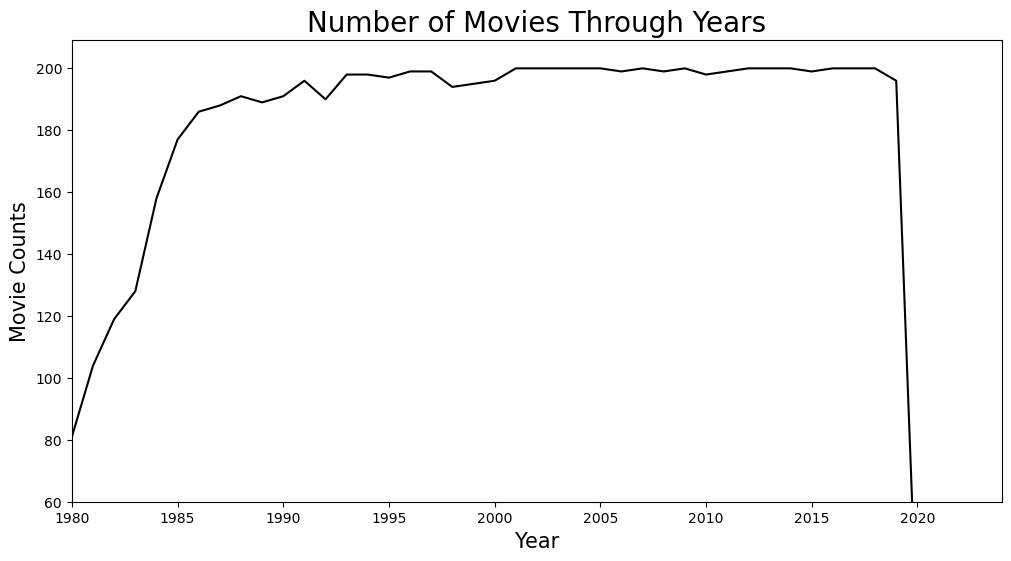

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=year.index, y=year, color="#000000")
plt.ylim(60)
plt.xlim(1980,2024)
plt.title('Number of Movies Through Years', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Movie Counts', fontsize=15)
plt.show()

# 2020 년에는 코로나..

In [83]:
pd.DataFrame(df["score"].describe())

,score
count,"7,479.0"
mean,6.4
std,1.0
min,1.9
25%,5.8
50%,6.5
75%,7.1
max,9.3


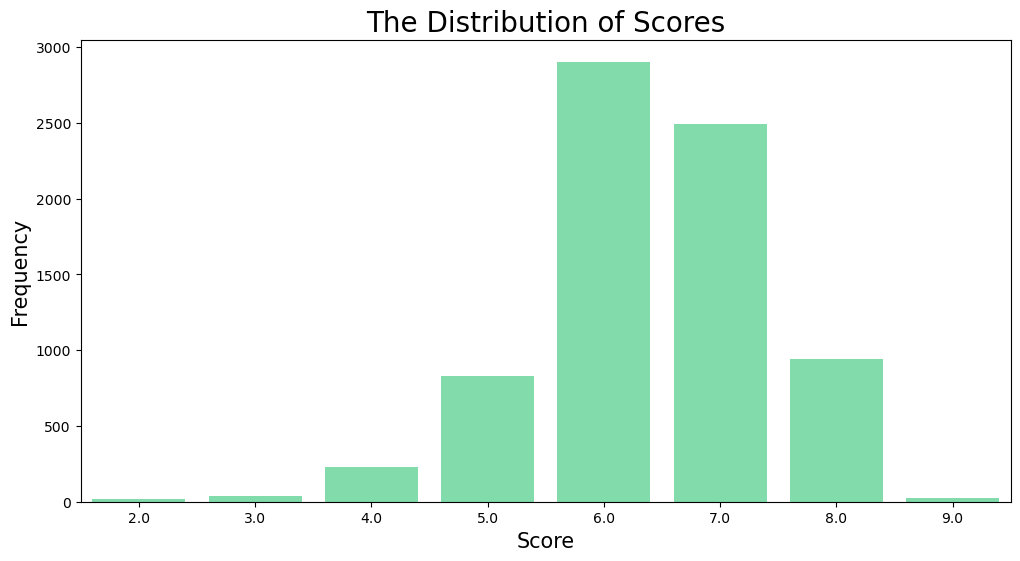

In [84]:
score_counts = df['score'].round().value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, color="#73EAA8")
plt.title("The Distribution of Scores", fontsize=20)
plt.xlabel("Score", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

In [85]:
mean_value = df['score'].mean()
median_value = df['score'].median()

print(f'mean value of score is : {mean_value:,.1f}') 
print(f'median value of score is : {median_value:,.1f}')


mean value of score is : 6.4
median value of score is : 6.5


In [86]:
print(f"The Skew of The Score Data: {df['score'].skew(): 0.2f}")

The Skew of The Score Data: -0.61


In [87]:
director = df["director"].value_counts()
director.head(10)

director
Woody Allen          38
Clint Eastwood       31
Directors            27
Steven Spielberg     27
Ron Howard           24
Ridley Scott         23
Steven Soderbergh    23
Joel Schumacher      22
Barry Levinson       20
Martin Scorsese      19
Name: count, dtype: int64

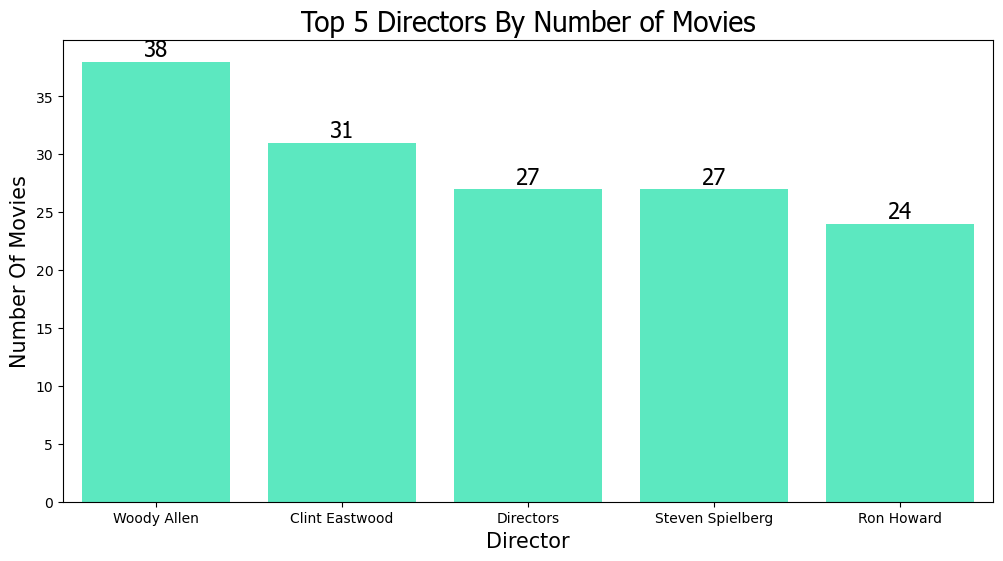

In [88]:
top_5_directors = director.nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_directors.index, y=top_5_directors.values, palette=["#45FFCA"])
plt.title('Top 5 Directors By Number of Movies', fontsize=20, family='tahoma')
plt.xlabel('Director', fontsize=15)
plt.ylabel('Number Of Movies', fontsize=15)
for index, value in enumerate(top_5_directors.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=16, family='tahoma')
plt.show()

In [89]:
movie_star = df["star"].value_counts()
movie_star.head(10)

star
Nicolas Cage          43
Tom Hanks             41
Robert De Niro        41
Denzel Washington     37
Tom Cruise            34
Bruce Willis          34
Johnny Depp           33
Sylvester Stallone    32
John Travolta         30
Steve Martin          29
Name: count, dtype: int64

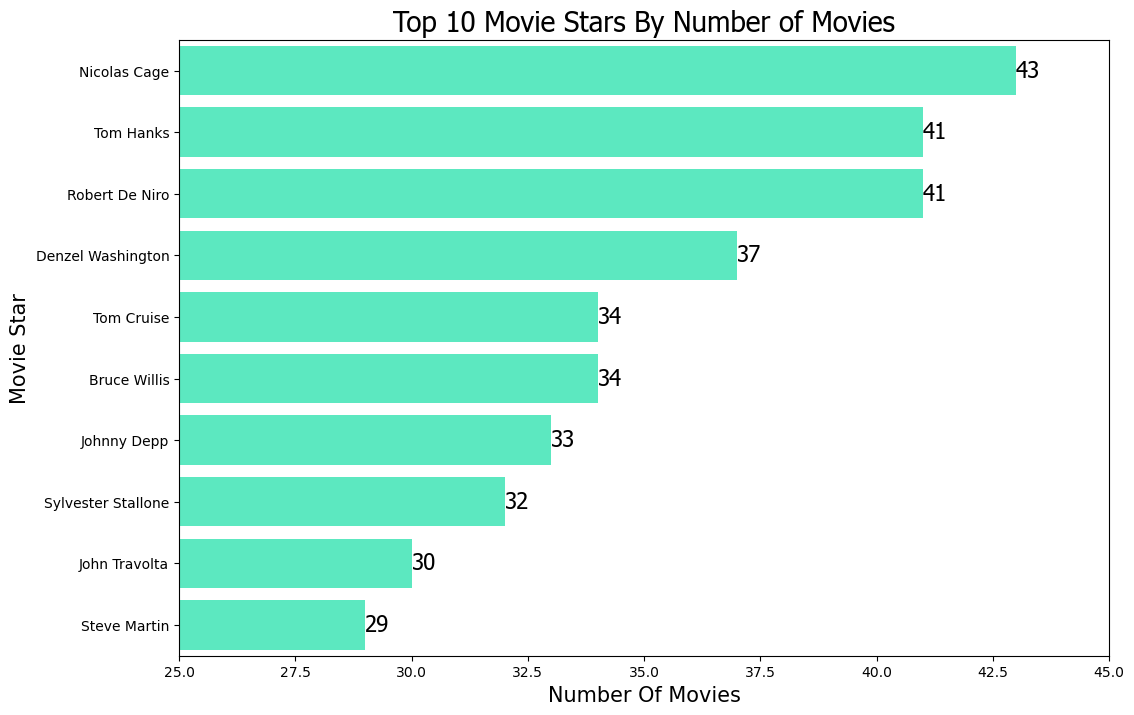

In [90]:
top_10_movie_stars = movie_star.nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_movie_stars.index, x=top_10_movie_stars.values, palette=["#45FFCA"])
plt.xlim(25, 45)
plt.title('Top 10 Movie Stars By Number of Movies', fontsize=20, family='tahoma')
plt.xlabel('Number Of Movies', fontsize=15)
plt.ylabel('Movie Star', fontsize=15)
for index, value in enumerate(top_10_movie_stars.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=16, family='tahoma')
plt.show()

top 10 여자, 남자 무비 스타

top 10 여자, 남자 감독 

In [91]:
country = df["country"].value_counts()
country.nlargest(10)

country
United States     5377
United Kingdom     798
France             262
Canada             183
Germany            116
Australia           86
Japan               76
India               59
Italy               57
Spain               44
Name: count, dtype: int64

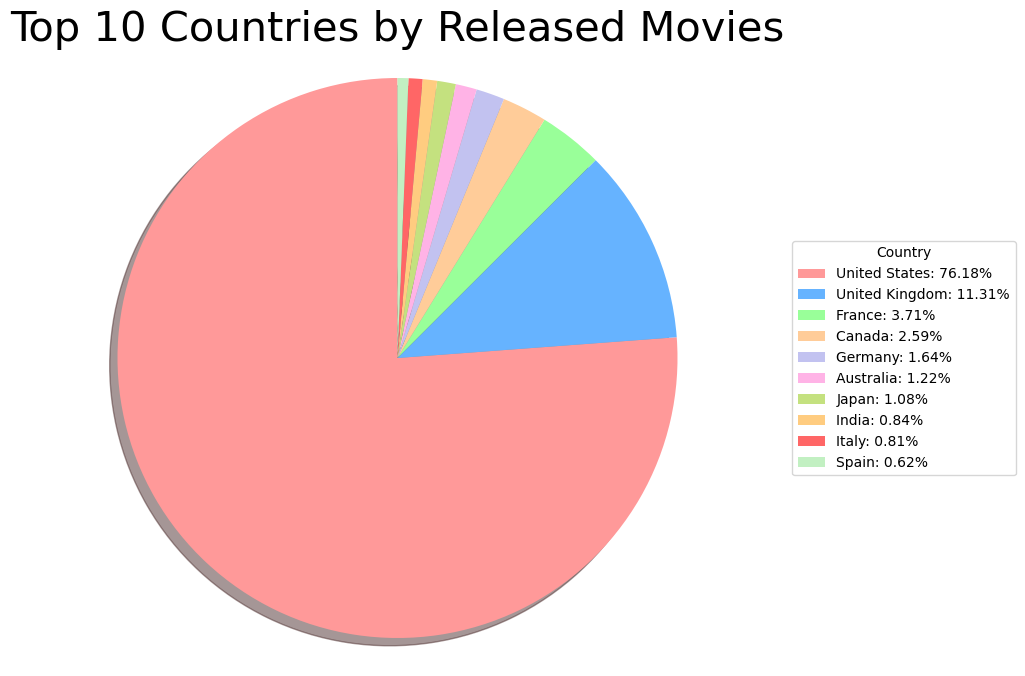

In [92]:
country = df["country"].value_counts().nlargest(10)
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6',
                 '#c4e17f','#ffcc80','#ff6666','#c2f0c2']

plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(country, startangle=90, colors=custom_colors, shadow=True)
plt.title('Top 10 Countries by Released Movies', fontsize=30)
plt.axis('equal')
plt.legend(wedges, [f'{label}: {value:.2f}%' for label, value in zip(country.index, country*100/country.sum())],
           title="Country", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.style.use('default') 
plt.show()

***
${\text{Top 5 Rated Movies}}$<br>
***

In [93]:
filt = df["score"].nlargest(10)
top_rated_movie = df.loc[filt.index, ["name", "score"]]
top_rated_movie.reset_index(drop=True)

,name,score
0,The Shawshank Redemption,9.3
1,The Dark Knight,9.0
2,Schindler's List,8.9
3,Pulp Fiction,8.9
4,The Lord of the Rings: The Return of the King,8.9
5,Forrest Gump,8.8
6,Fight Club,8.8
7,The Lord of the Rings: The Fellowship of the Ring,8.8
8,Inception,8.8
9,Star Wars: Episode V - The Empire Strikes Back,8.7


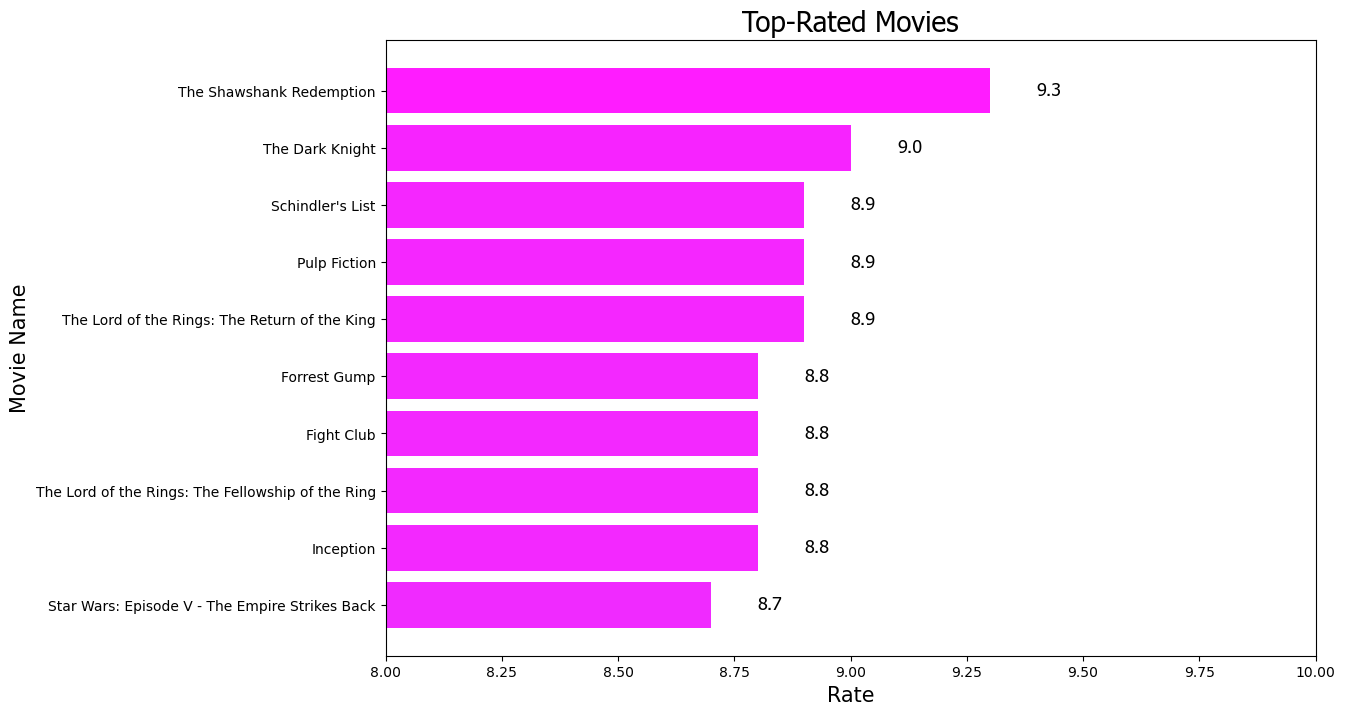

In [94]:
top_rated_movie = top_rated_movie[::-1]
plt.figure(figsize=(12, 8))
bars = plt.barh(
    y=top_rated_movie['name'], 
    width=top_rated_movie['score'], 
    color=plt.cm.cool(top_rated_movie['score'] / top_rated_movie['score'].max()), 
    alpha=0.89
)
plt.xlim(8, 10)
plt.title('Top-Rated Movies', fontsize=20, family='tahoma')
plt.xlabel('Rate', fontsize=15)
plt.ylabel('Movie Name', fontsize=15)
for i in range(len(top_rated_movie)):
    plt.text(top_rated_movie['score'].iloc[i] + 0.1, i, 
             f'{top_rated_movie["score"].iloc[i]}', fontsize=13, family='tahoma', va='center')
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=top_rated_movie['score'].min(),
                                                           vmax=top_rated_movie['score'].max()))
sm.set_array([])
plt.show()

***
${\text{Each year, average gross revenue}}$<br>
***

In [95]:
gross_per_year = df.groupby("year")["gross"].mean()
gross_per_year.head(5)

year
1980   30,662,555.1
1981   24,231,393.2
1982   26,786,390.9
1983   21,484,411.1
1984   22,361,343.0
Name: gross, dtype: float64

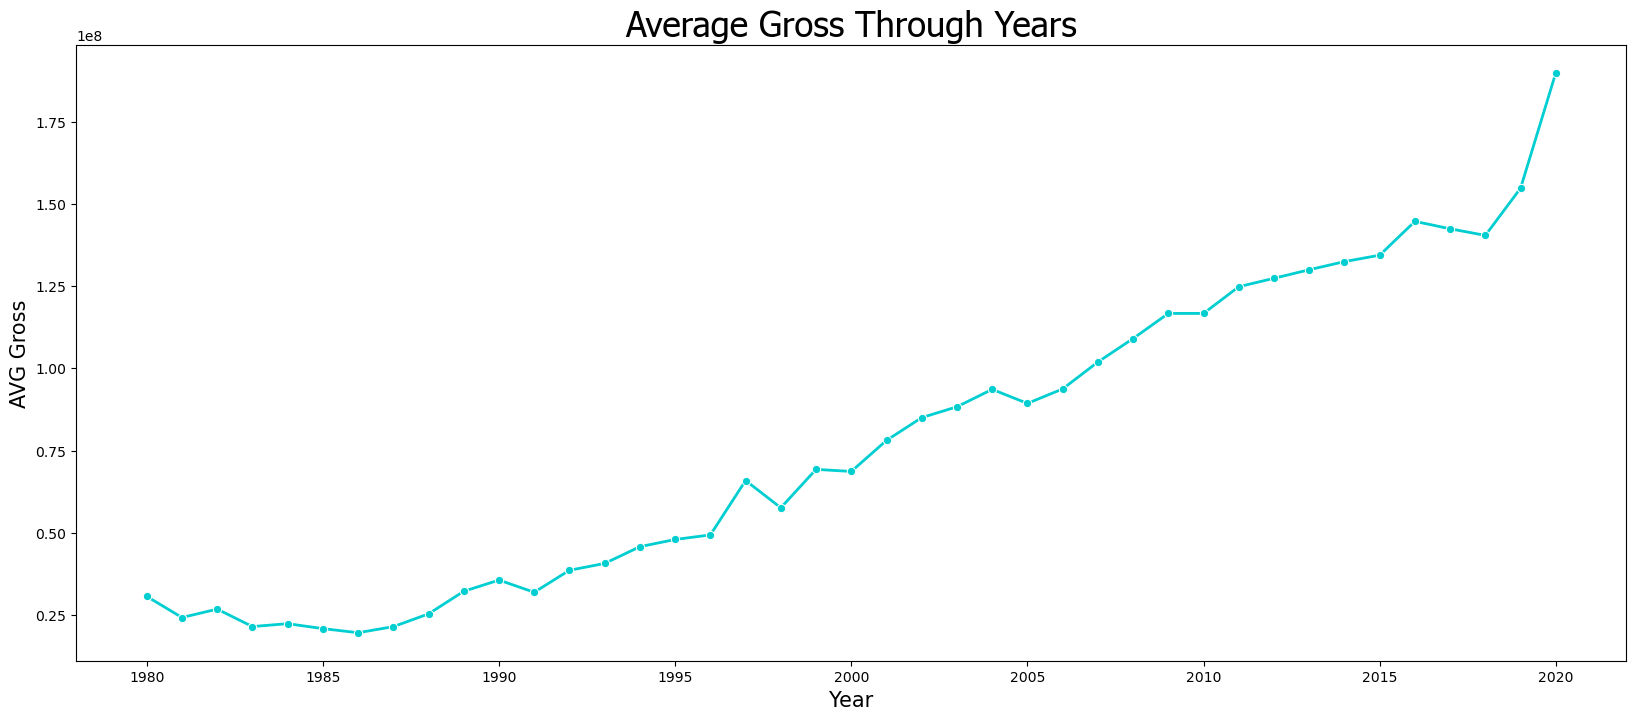

In [96]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=gross_per_year.index, y=gross_per_year, color="#00CED1", marker='o', linewidth=2)
plt.title('Average Gross Through Years', fontsize=25, family='tahoma')
plt.xlabel('Year', fontsize=15)
plt.ylabel('AVG Gross', fontsize=15)
plt.show()

변곡점에 무슨 일이 있었는지 추가하기..?

***
${\text{Top 10 Company by Gross Revenue (Hyeyeon)}}$<br>
***

In [97]:
gross_via_comapny = df.groupby("company")["gross"].mean().sort_values(ascending=False)
gross_via_comapny = gross_via_comapny.head(10)
pd.DataFrame(gross_via_comapny)

,gross
company,
Marvel Studios,"1,255,466,034.2"
Illumination Entertainment,"1,097,122,396.5"
Fairview Entertainment,"966,554,929.0"
B24,"880,681,519.0"
Avi Arad Productions,"856,085,151.0"
Chris Morgan Productions,"759,056,935.0"
Jolie Pas,"758,411,779.0"
Coco Cartoon,"726,264,074.0"
Lucasfilm,"718,535,219.2"


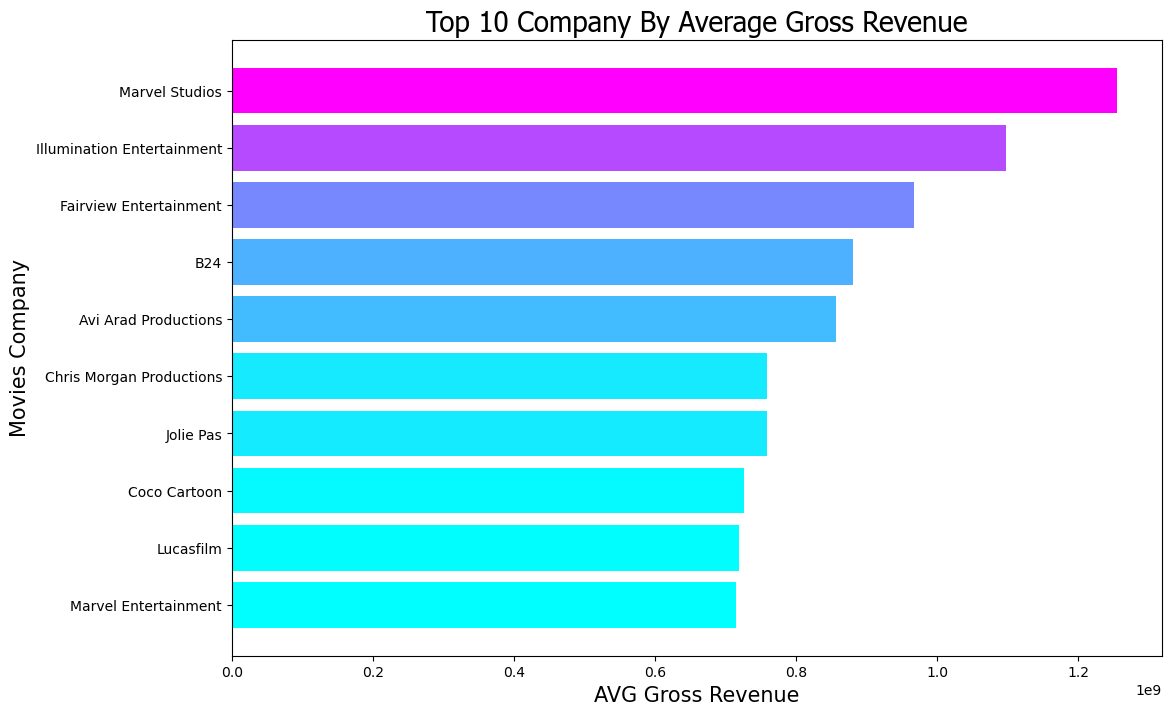

In [98]:
top_10_companies = gross_via_comapny.nlargest(10)[::-1]
norm = plt.Normalize(top_10_companies.min(), top_10_companies.max())
colors = plt.cm.cool(norm(top_10_companies.values))

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_companies.index, top_10_companies.values, color=colors)

plt.title('Top 10 Company By Average Gross Revenue', fontsize=20, family='tahoma')
plt.xlabel('AVG Gross Revenue', fontsize=15)
plt.ylabel('Movies Company', fontsize=15)
plt.show()

***
${\text{Top 3 Genres in each year (Juheon)}}$<br>
***

In [99]:
filt = (df["year"] >= 2010) & (df["year"] <= 2019)
dff = df[filt].copy()

In [100]:
year_vs_genre = dff.groupby("year", as_index=False)["genre"].value_counts()
filt = year_vs_genre.groupby("year")["count"].nlargest(3).droplevel(0).index

year_vs_genre = year_vs_genre.iloc[filt]
year_vs_genre["year"] = year_vs_genre["year"].astype(str) 
year_vs_genre.head(10)

,year,genre,count
0,2010,Comedy,55
1,2010,Action,52
2,2010,Drama,37
10,2011,Action,53
11,2011,Drama,48
12,2011,Comedy,45
22,2012,Comedy,55
23,2012,Action,47
24,2012,Drama,40
31,2013,Action,55


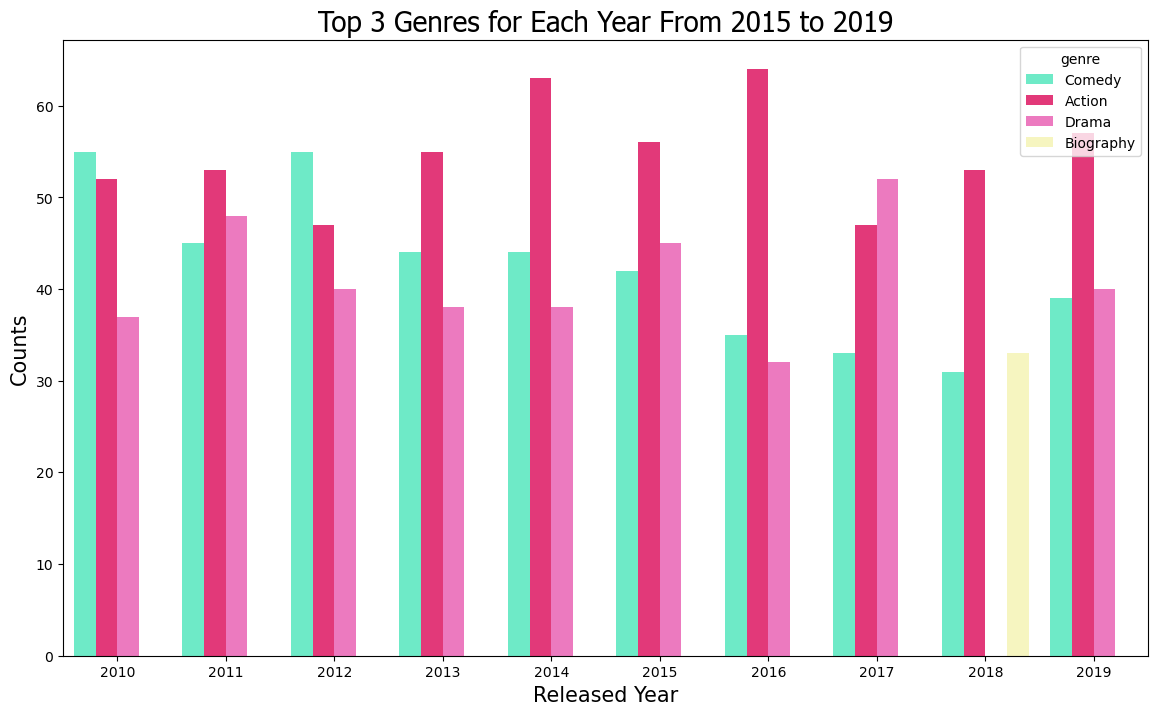

In [101]:
plt.figure(figsize=(14, 8))
sns.barplot(data=year_vs_genre, x='year', y='count', hue='genre', 
            palette=["#45FFCA","#FF0060","#FF55BB", "#FFFDAF"], alpha=0.89)
plt.title('Top 3 Genres for Each Year From 2015 to 2019', fontsize=20, family='tahoma')
plt.xlabel('Released Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

***
${\text{Correlation}}$<br>
***

In [102]:
df_corr = df[["score", "votes",  "budget", "gross"]]

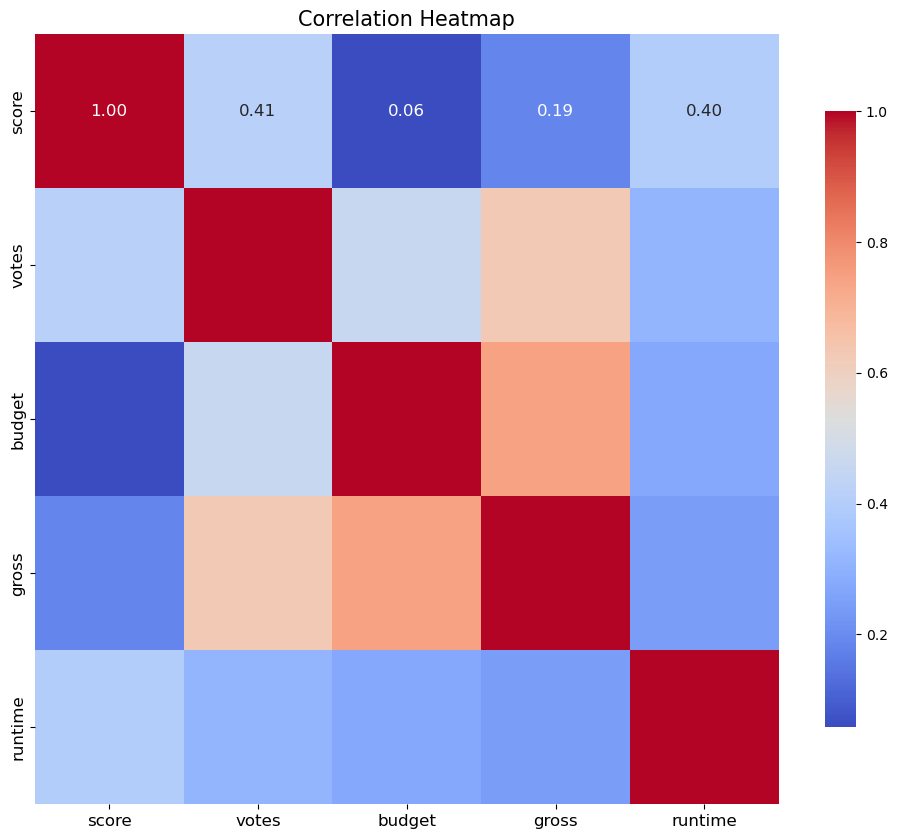

In [103]:
numeric_df = df[['score', 'votes', 'budget', 'gross', 'runtime']]

corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 12}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', size=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

R-squared: 0.6165
Root Mean Squared Error (RMSE): 106403258.8573


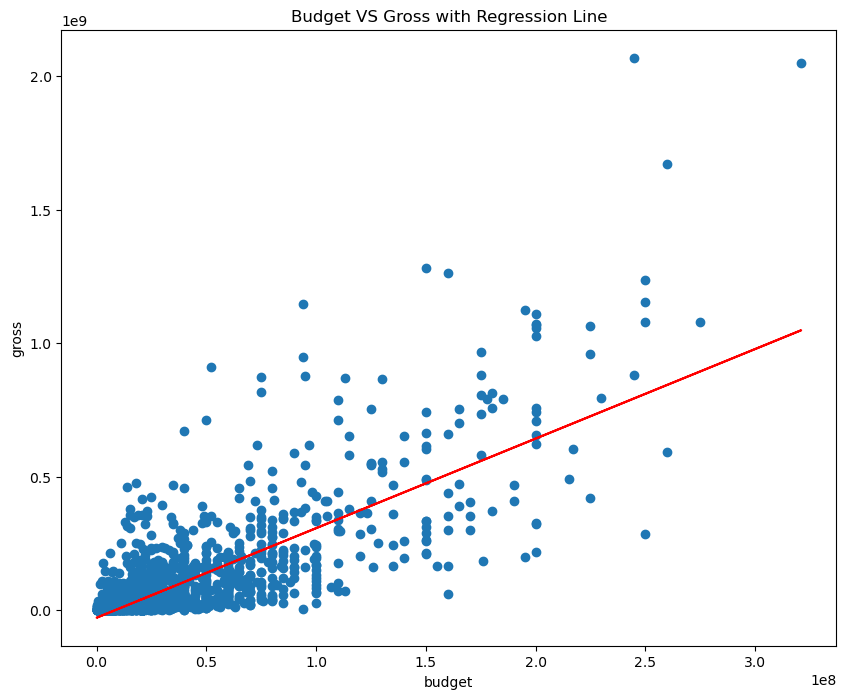

In [104]:
plt.figure(figsize=(10, 8))
x = df['budget'].values.reshape(-1, 1)
y = df['gross'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r_squared = r2_score(y_test, y_predicted)
print(f'R-squared: {round(r_squared,4)}')

rmse = mean_squared_error(y_test, y_predicted, squared =False)
print(f'Root Mean Squared Error (RMSE): {round(rmse,4)}')

plt.scatter(x_test,y_test)
plt.title('Budget VS Gross with Regression Line')
plt.xlabel("budget")
plt.ylabel("gross")
plt.plot(x_test,y_predicted, color ='red')
plt.show()

R-squared: 0.4342
Root Mean Squared Error (RMSE): 129238650.8175


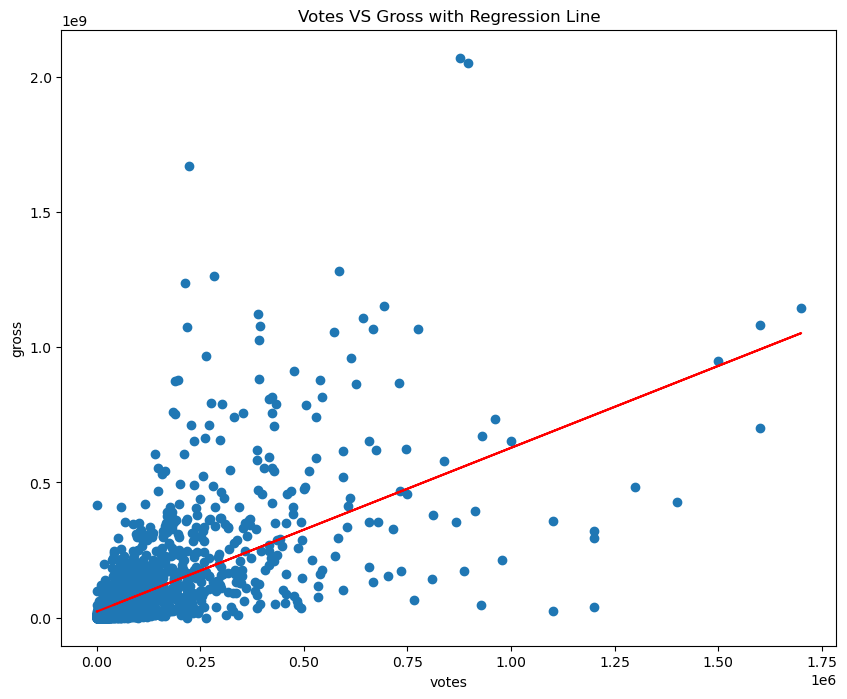

In [105]:
plt.figure(figsize=(10, 8))
X_votes = df['votes'].values.reshape(-1, 1)
y_gross = df['gross'].values

X_train_votes, X_test_votes, y_train_gross, y_test_gross = train_test_split(
    X_votes, y_gross, test_size=0.3, random_state=101)

model_votes = LinearRegression()
model_votes.fit(X_train_votes, y_train_gross)

y_predicted_votes = model_votes.predict(X_test_votes)

r_squared_votes = r2_score(y_test_gross, y_predicted_votes)
print(f'R-squared: {r_squared_votes:.4f}')

rmse = mean_squared_error(y_test_gross, y_predicted_votes, squared =False)
print(f'Root Mean Squared Error (RMSE): {round(rmse,4)}')

plt.scatter(X_test_votes, y_test_gross)
plt.title('Votes VS Gross with Regression Line')
plt.xlabel("votes")
plt.ylabel("gross")
plt.plot(X_test_votes, y_predicted_votes, color='red') 
plt.show()


R-squared: 0.0409
Root Mean Squared Error (RMSE): 168261955.8808


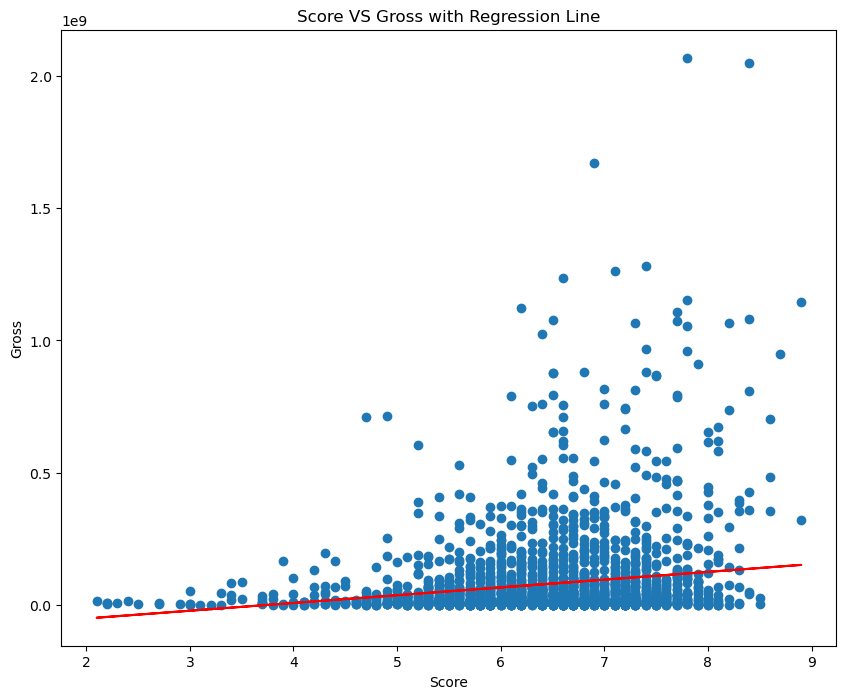

In [106]:
df = df.dropna(subset=['score', 'gross'])

X_score = df['score'].values.reshape(-1, 1)
y_gross = df['gross'].values

X_train_score, X_test_score, y_train_gross, y_test_gross = train_test_split(
    X_score, y_gross, test_size=0.3, random_state=101)

model_score = LinearRegression()
model_score.fit(X_train_score, y_train_gross)

y_predicted_score = model_score.predict(X_test_score)

r_squared_score = r2_score(y_test_gross, y_predicted_score)
rmse_score = mean_squared_error(y_test_gross, y_predicted_score, squared=False)
print(f'R-squared: {r_squared_score:.4f}')
print(f'Root Mean Squared Error (RMSE): {round(rmse_score, 4)}')

plt.figure(figsize=(10, 8))
plt.scatter(X_test_score, y_test_gross)
plt.plot(X_test_score, y_predicted_score, color='red')
plt.title('Score VS Gross with Regression Line')
plt.xlabel("Score")
plt.ylabel("Gross")
plt.show()

R-squared: 0.0638
Root Mean Squared Error (RMSE): 166261057.7184


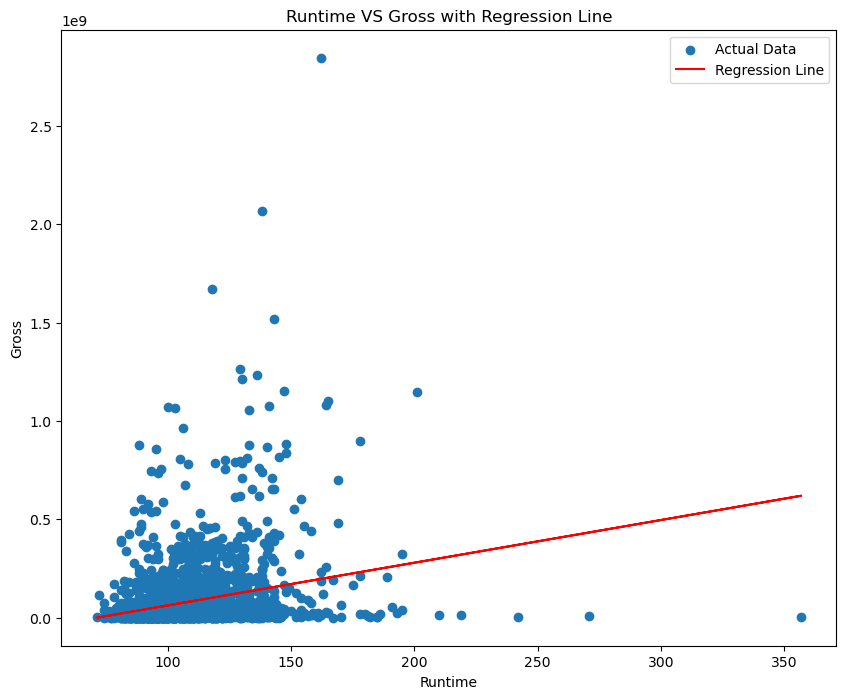

In [107]:
df_cleaned = df.dropna(subset=['runtime', 'gross'])

X_runtime = df_cleaned['runtime'].values.reshape(-1, 1)
y_gross = df_cleaned['gross'].values

X_train_runtime, X_test_runtime, y_train_gross, y_test_gross = train_test_split(
    X_runtime, y_gross, test_size=0.3, random_state=101)

model_runtime = LinearRegression()
model_runtime.fit(X_train_runtime, y_train_gross)

y_predicted_runtime = model_runtime.predict(X_test_runtime)

r_squared_runtime = r2_score(y_test_gross, y_predicted_runtime)
rmse_runtime = mean_squared_error(y_test_gross, y_predicted_runtime, squared=False)

print(f'R-squared: {r_squared_runtime:.4f}')
print(f'Root Mean Squared Error (RMSE): {round(rmse_runtime, 4)}')

plt.figure(figsize=(10, 8))
plt.scatter(X_test_runtime, y_test_gross, label='Actual Data')
plt.plot(X_test_runtime, y_predicted_runtime, color='red', label='Regression Line')
plt.title('Runtime VS Gross with Regression Line')
plt.xlabel("Runtime")
plt.ylabel("Gross")
plt.legend()
plt.show()

In [108]:
df_cleaned = df.dropna(subset=['budget', 'votes', 'score', 'runtime', 'gross'])

X = df_cleaned[['budget', 'votes', 'score', 'runtime']]
y = df_cleaned['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r_squared:.4f}')
print(f'Root Mean Squared Error (RMSE): {round(rmse, 4)}')


R-squared: 0.6958
Root Mean Squared Error (RMSE): 94767387.124


***
${\text{Conclusions (Jungbin, Soobin)}}$<br>
***

Our analysis shows that higher budgets significantly boost a movie's gross earnings, with a strong positive correlation evident in our data. Audience engagement, measured by votes, also positively impacts financial success, highlighting the importance of effective marketing and interaction. Popular genres like comedy, action, and drama dominate the market, but exploring niche genres can capture additional audiences. The distribution of movie ratings indicates a focus on mature and teenage audiences, suggesting content should be tailored to these demographics. The film industry has grown steadily, although global events like the COVID-19 pandemic can cause disruptions. Key contributors such as prolific directors and actors play a significant role in industry trends. To ensure continued growth, investing in high-quality production, active audience engagement, and adaptable strategies is essential. Utilizing data-driven insights will help filmmakers make informed decisions and succeed in a competitive market.